# Оценка эффективности моделей бинарной классификации.

### Ворошилов Владислав
### Группа: ПИ20-3

In [1]:
import pandas as pd
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score 

## Загрузите данные о вероятности развития сердечного приступа. Описание датасета смотрите здесь: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

In [2]:
df = pd.read_csv("heart.csv")

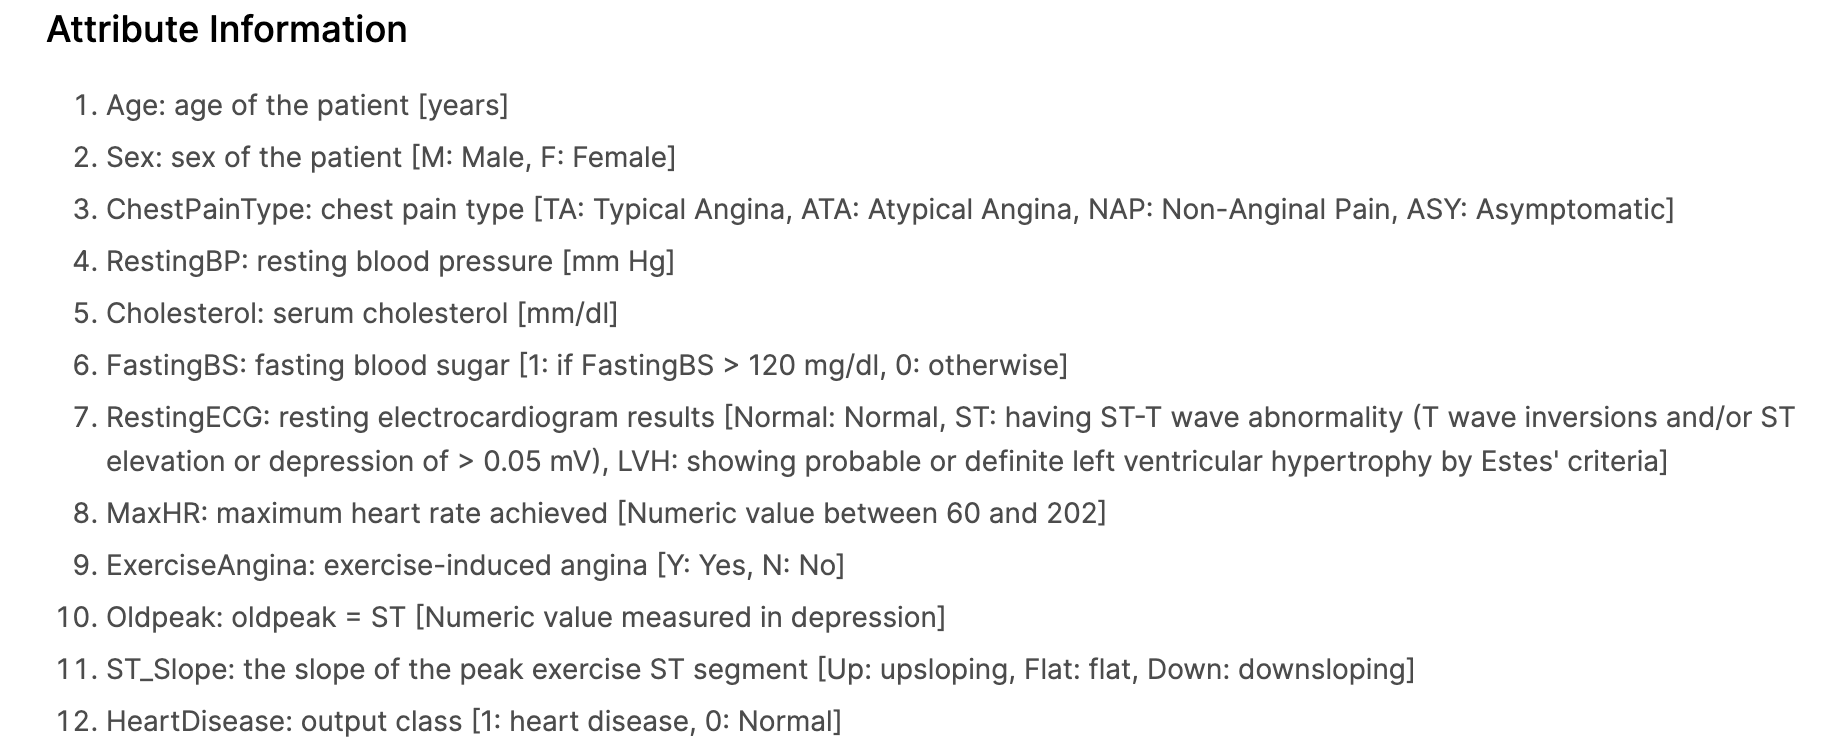

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [5]:
df['Sex'] = pd.factorize(df['Sex'])[0]

In [6]:
df["Sex"].value_counts()

0    725
1    193
Name: Sex, dtype: int64

In [7]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [9]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [10]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [11]:
df['ChestPainType'] = pd.factorize(df['ChestPainType'])[0]

In [12]:
df['RestingECG'] = pd.factorize(df['RestingECG'])[0]

In [13]:
df['ExerciseAngina'] = pd.factorize(df['ExerciseAngina'])[0]

In [14]:
df['ST_Slope'] = pd.factorize(df['ST_Slope'])[0]

In [15]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


## Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

In [16]:
output = "HeartDisease"
y = df[output]
X = df.drop(columns = [output])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

## Постройте следующие модели классификации:

In [18]:
def classify(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return model

### случайное предсказание (подбрасывание кубика)

In [19]:
y_pred_trivial = np.random.randint(2, size=y_test.shape[0])
print(classification_report(y_test, y_pred_trivial))

              precision    recall  f1-score   support

           0       0.41      0.51      0.45        77
           1       0.57      0.48      0.52       107

    accuracy                           0.49       184
   macro avg       0.49      0.49      0.49       184
weighted avg       0.51      0.49      0.49       184



### логистическая регрессия (LogisticRegression)

In [20]:
logReg = classify(LogisticRegression(max_iter=5000), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



### метод опорных векторов с линейным ядром (SVC(kernel='linear'))

In [21]:
svc = classify(SVC(kernel='linear', probability=True), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



### метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

In [22]:
lda = classify(LinearDiscriminantAnalysis(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        77
           1       0.85      0.88      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### метод k ближайших соседей (KNeighborsClassifier с двумя классами)

In [23]:
knn = classify(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        77
           1       0.72      0.74      0.73       107

    accuracy                           0.68       184
   macro avg       0.68      0.67      0.67       184
weighted avg       0.68      0.68      0.68       184



## На основе метрики accuracy сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

In [24]:
accuracy_score(y_train, logReg.predict(X_train))

0.8569482288828338

In [25]:
accuracy_score(y_test, logReg.predict(X_test))

0.842391304347826

## Сделайте вывод о применимости каждой модели на основе метрики F1-score (чем выше её значение, тем модель эффективнее).

## На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

In [47]:
linestyle_tuple =  [
     ('solid', 'solid'),      
     ('dotted', 'dotted'),    
     ('dashed', 'dashed'),    
     ('dashdot', 'dashdot')] 

def printROC(X_test, y_test, model=None, y_proba=None, name=None):
    global linestyle_tuple
    if not (model is None):
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
        probs = y_pred_proba[:, 1]
        fpr, tpr, treshold = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
    else:
        fpr, tpr, treshold = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
    if name is None:
        name = str(model.__class__).split(".")[-1].strip("'>'")
        
    plt.plot(fpr, tpr, color=(np.random.random(), np.random.random(), np.random.random()),
         label= name + ' (area = %0.6f)' % roc_auc, linestyle=linestyle_tuple[np.random.randint(len(linestyle_tuple), size=1)[0]][1])
    plt.plot([0, 1], [0, 1], color='red', linestyle=(0, (1, 10)))
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Пример ROC-кривой')
    plt.legend(loc="lower right")
    return roc_auc

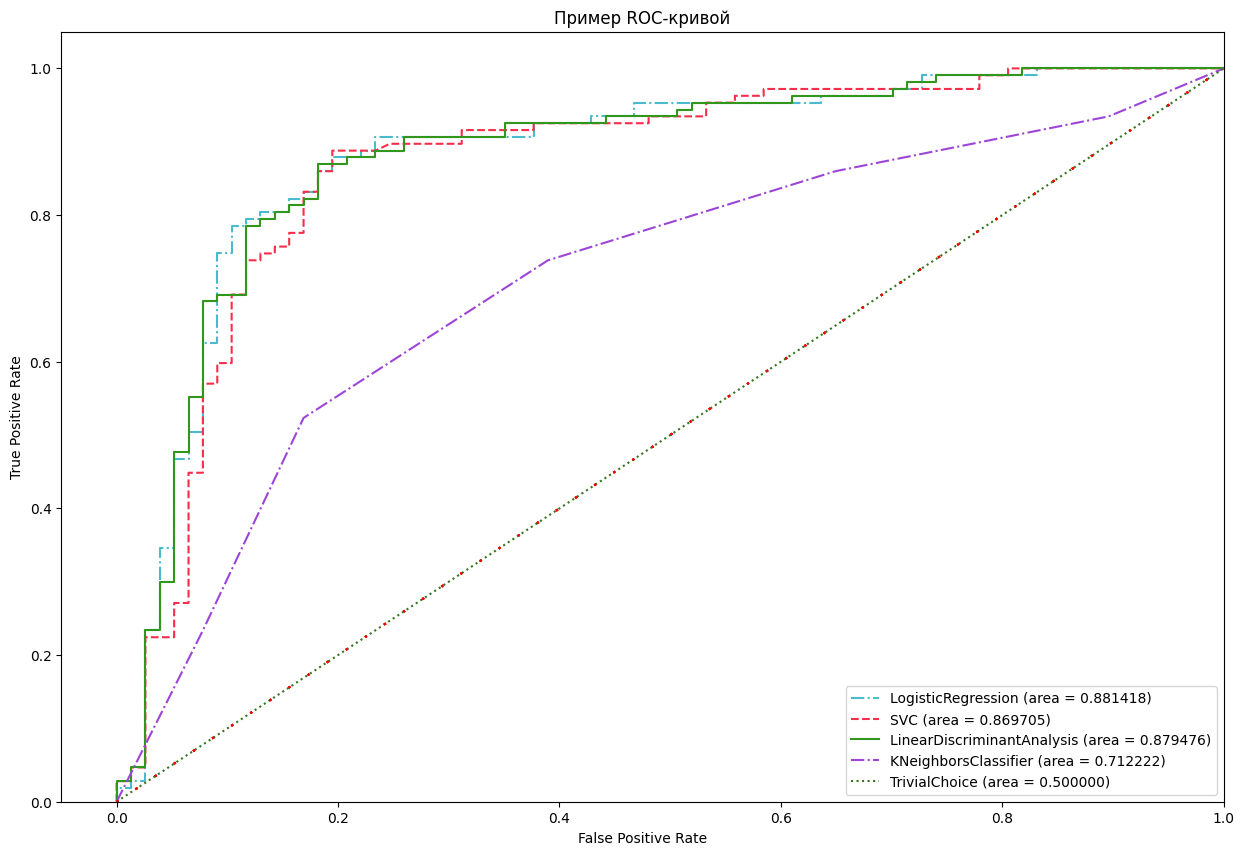

In [58]:
plt.figure(figsize=(15, 10))
models = {
    "LogisticRegression": printROC(X_test, y_test, model=logReg),
    "SVC": printROC(X_test, y_test, model=svc),
    "LinearDiscriminantAlanysis": printROC(X_test, y_test, model=lda),
    "KNeighborsClassifier": printROC(X_test, y_test, model=knn), 
    "TrivialChoice": printROC(X_test, y_test, model=None, y_proba=np.array([0.5 for _ in range(y_test.shape[0])]), name="TrivialChoice")
}

## Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.

In [51]:
for k, v in [(k, v) for k, v in sorted(models.items(), key=lambda x: x[1], reverse=True)]:
    print(f"{k}: {v}")

LogisticRegression: 0.881417647772788
LinearDiscriminantAlanysis: 0.8794756645223936
SVC: 0.8697050612938464
KNeighborsClassifier: 0.7122223570821702
TrivialChoice: 0.5
